<a href="https://colab.research.google.com/github/malasiaa/Weather_timeseries/blob/main/Weather_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Initial Setup

In [34]:
import os
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
os.environ['KAGGLE_USERNAME'] = 'kekudulaa'
os.environ['KAGGLE_KEY'] = '650da366fb5703f82e8e036d0e391d48'

In [5]:
!kaggle datasets download -d stytch16/jena-climate-2009-2016

Dataset URL: https://www.kaggle.com/datasets/stytch16/jena-climate-2009-2016
License(s): CC0-1.0
 38% 5.00M/13.2M [00:00<00:00, 36.6MB/s]
100% 13.2M/13.2M [00:00<00:00, 63.0MB/s]


In [6]:
csv_path = "jena-climate-2009-2016.zip"
df = pd.read_csv(csv_path)

In [7]:
#getting data for only the first year
df = df.iloc[:52560]

#Data understanding

In [8]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date Time        52560 non-null  object 
 1   p (mbar)         52560 non-null  float64
 2   T (degC)         52560 non-null  float64
 3   Tpot (K)         52560 non-null  float64
 4   Tdew (degC)      52560 non-null  float64
 5   rh (%)           52560 non-null  float64
 6   VPmax (mbar)     52560 non-null  float64
 7   VPact (mbar)     52560 non-null  float64
 8   VPdef (mbar)     52560 non-null  float64
 9   sh (g/kg)        52560 non-null  float64
 10  H2OC (mmol/mol)  52560 non-null  float64
 11  rho (g/m**3)     52560 non-null  float64
 12  wv (m/s)         52560 non-null  float64
 13  max. wv (m/s)    52560 non-null  float64
 14  wd (deg)         52560 non-null  float64
dtypes: float64(14), object(1)
memory usage: 6.0+ MB


In [10]:
# changing the type of variable in column Date Time
df['Date Time'] = pd.to_datetime(df['Date Time'], format='mixed')
# setting it has index
df= df.set_index('Date Time')

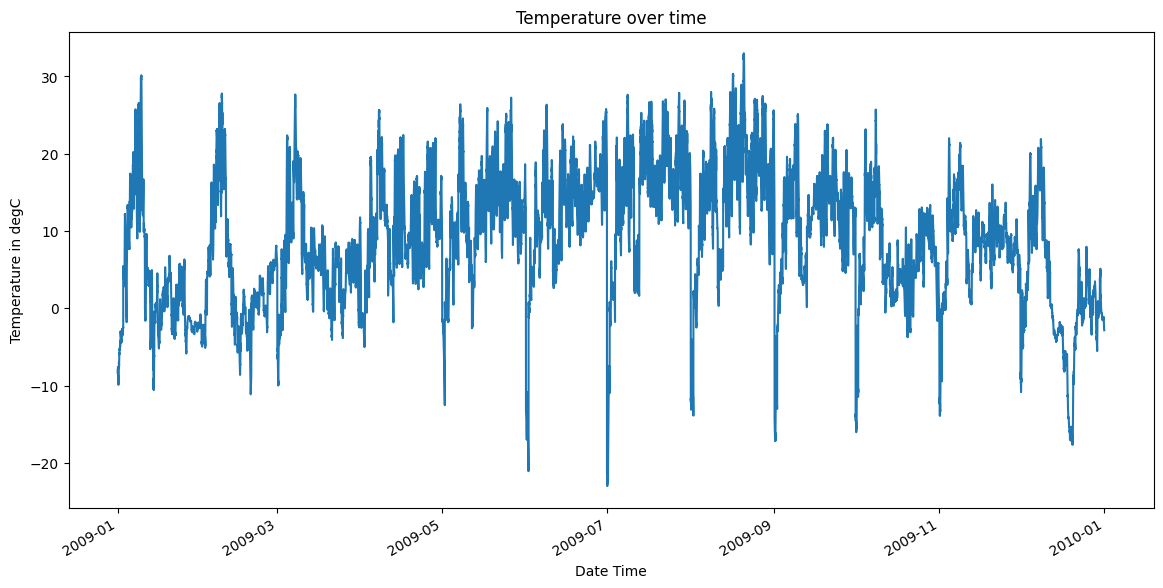

In [11]:
#line plot
plt.figure(figsize=(14,7))
df['T (degC)'].plot()
plt.title('Temperature over time')
plt.xlabel('Date Time')
plt.ylabel('Temperature in degC')
plt.show()

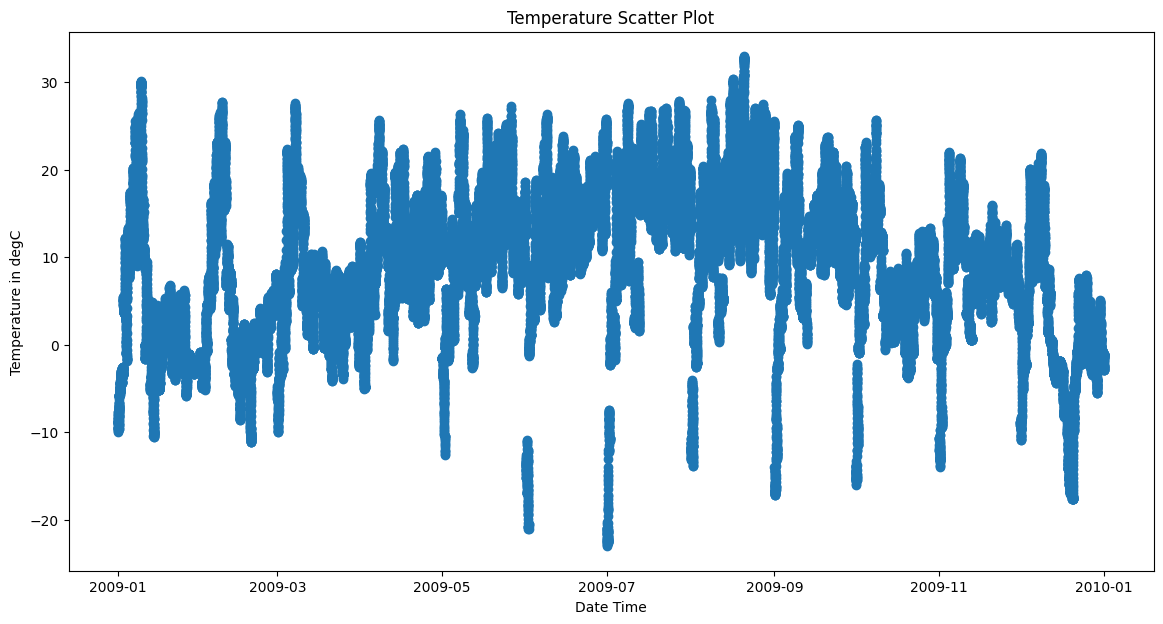

In [12]:
#line plot
plt.figure(figsize=(14,7))
plt.scatter(df.index, df['T (degC)'])
plt.title('Temperature Scatter Plot')
plt.xlabel('Date Time')
plt.ylabel('Temperature in degC')
plt.show()

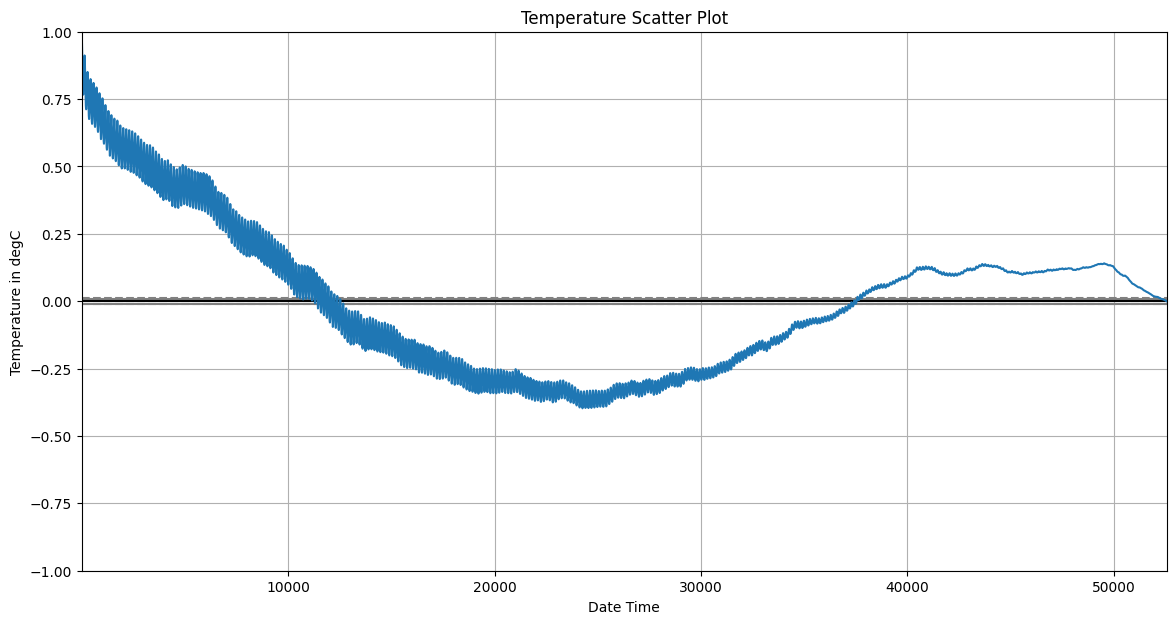

In [13]:
# Autrocorrelatioj plot

plt.figure(figsize=(14,7))
pd.plotting.autocorrelation_plot(df['T (degC)'])
plt.title('Temperature Scatter Plot')
plt.xlabel('Date Time')
plt.ylabel('Temperature in degC')
plt.show()

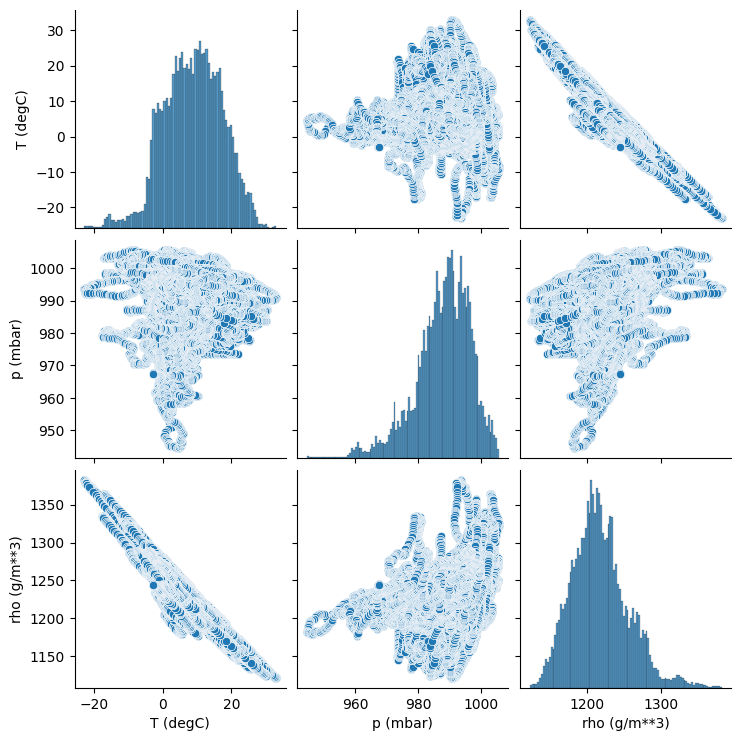

In [14]:
# Pairplot
sns.pairplot(df[['T (degC)', 'p (mbar)', 'rho (g/m**3)']])
plt.show()

#Data Preparation

In [15]:
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


In [16]:
# Define a learning rate schedule function
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)

In [17]:
# The predicted variable will be the column "temperature"
df = df['T (degC)']

In [18]:
df.describe()

count    52560.000000
mean         8.829617
std          8.476075
min        -23.010000
25%          2.980000
50%          9.120000
75%         15.080000
max         32.980000
Name: T (degC), dtype: float64

In [19]:
df.shape


(52560,)

In [20]:
# Need to reshape, because it is only 1D array
df = df.values.reshape(-1, 1)


In [21]:
# Normalizing data
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df))

In [22]:
##Feature Engineering in Time Series
#Lags
#Rolling windows
#Cyclical features

# Create lag variables
window_size = 10


# The assign method in pandas allows you to add new columns to a DataFrame.
# **{}: This syntax is used to unpack a dictionary into keyword arguments. In this case, the dictionary is created by a dictionary comprehension.


df = df.assign(**{
    '{} (t-{})'.format(col, t): df[col].shift(t)
    for t in range(window_size)
    for col in df
})



In [23]:
rows_to_drop = df.shape[0] - df.dropna().shape[0]
print("NA rows to drop: " + str(rows_to_drop))
df = df.dropna()

NA rows to drop: 9


In [24]:
df

,0,0 (t-0),0 (t-1),0 (t-2),0 (t-3),0 (t-4),0 (t-5),0 (t-6),0 (t-7),0 (t-8),0 (t-9)
9,0.260404,0.260404,0.269691,0.274871,0.274871,0.267191,0.263261,0.262547,0.258975,0.260761,0.267726
10,0.254510,0.254510,0.260404,0.269691,0.274871,0.274871,0.267191,0.263261,0.262547,0.258975,0.260761
11,0.252366,0.252366,0.254510,0.260404,0.269691,0.274871,0.274871,0.267191,0.263261,0.262547,0.258975
12,0.252902,0.252902,0.252366,0.254510,0.260404,0.269691,0.274871,0.274871,0.267191,0.263261,0.262547
13,0.253260,0.253260,0.252902,0.252366,0.254510,0.260404,0.269691,0.274871,0.274871,0.267191,0.263261
...,...,...,...,...,...,...,...,...,...,...,...
52555,0.362029,0.362029,0.362743,0.363458,0.364708,0.365958,0.366315,0.367566,0.367744,0.368816,0.370602
52556,0.360600,0.360600,0.362029,0.362743,0.363458,0.364708,0.365958,0.366315,0.367566,0.367744,0.368816
52557,0.360243,0.360243,0.360600,0.362029,0.362743,0.363458,0.364708,0.365958,0.366315,0.367566,0.367744
52558,0.360243,0.360243,0.360243,0.360600,0.362029,0.362743,0.363458,0.364708,0.365958,0.366315,0.367566


In [25]:
# Check for stationarity
result = adfuller(df[0])
print('ADF Statistic: %f' % result[0])
print('p_value: %f' % result[1])

if result [1] > 0.05:
  print("The series is not stationary.")
  print("Applying first order differencing...")
  df[0] = df[0].diff().dropna()
else:
  print("The series is stationary.")

ADF Statistic: -7.175390
p_value: 0.000000
The series is stationary.


In [26]:
# Split data into train a test
train, test = train_test_split(df, test_size=0.2, shuffle=False)
len(train), len(test)

(42040, 10511)

In [27]:
## Potential Sequence Bias
# Trend bias
# Seasonal bias
# Autocorrelation bias

## How to detect
# Residuals analysis
# Statistical test

## How to mitigate
# Differencing - (used to mitigate trend and autocorr bias) difference between consecutive observations
# Detrending - (used to mitigate trend bias)
# Bootstranpping - (used to mitigate general bias) Generates several boostrap samples from original data and averaging model prediction acrros the samples

Analyzing sequence bias...


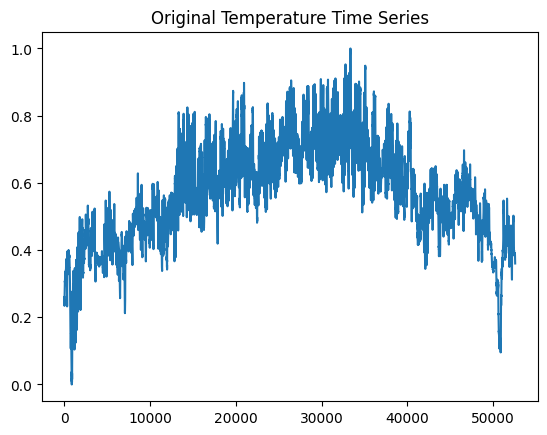

"Chi-square statistic: 231434603.99999934, p_value 0.41889084145717154
No sequence bias detected.


In [28]:
df_diff = df.copy()
df_sample = df.copy()

import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

print("Analyzing sequence bias...")

# Sequence Bias
df[0].plot()
plt.title("Original Temperature Time Series")
plt.show()

# Chi-square test to confirm presence of sequence bias
contingency_table = pd.crosstab(df.index, df[0])
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'"Chi-square statistic: {chi2}, p_value {p}')

# If p_value less than 0.05, there is sequence bias
if p < 0.05:
  print("Sequence bias detected.")
else:
  print("No sequence bias detected.")

Applied first order differencing.


<function matplotlib.pyplot.show(close=None, block=None)>

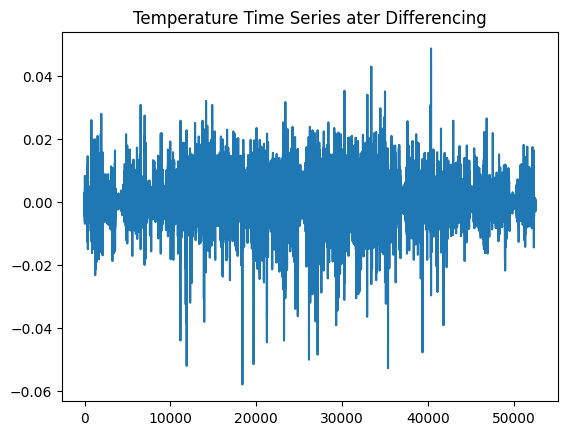

In [29]:
## In case of sequence bias we can use the following techniques

# Technique 1: Differencing
df_diff[0] = df_diff[0].diff()
df_diff.dropna(inplace=True)
print("Applied first order differencing.")

# Plotting time series after applying Differencing
df_diff[0].plot()
plt.title("Temperature Time Series ater Differencing")
plt.show

Randomly sampled data size: 26276


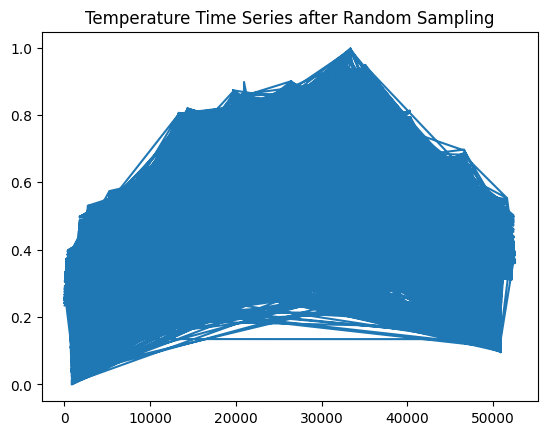

In [30]:
#Technique 2: Randomly sampling sections of the series
df_sample = df_sample.sample(frac=0.5, random_state = 42)
print(f"Randomly sampled data size: {len(df_sample)}")

# Platting time series after Randomly Sampling
df_sample[0].plot()
plt.title("Temperature Time Series after Random Sampling")
plt.show()

#Model defenition and training

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [32]:
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(window_size, 10)))
model.add(Dense(1))

In [43]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [44]:
# Reshaping data to fit the model
X_train = np.array([train.iloc[i-window_size:i, 1:].values for i in range(window_size, len(train))])
y_train = train.iloc[window_size:, 0].values
X_test = np.array([test.iloc[i-window_size:i, 1:].values for i in range(window_size, len(test))])
y_test = test.iloc[window_size:, 0].values

In [45]:
# model training
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1314/1314 [==============================] - 5s 4ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0171 - val_mse: 0.0171
Epoch 2/10
1314/1314 [==============================] - 3s 2ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0216 - val_mse: 0.0216
Epoch 3/10
1314/1314 [==============================] - 3s 2ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 4/10
1314/1314 [==============================] - 3s 2ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0178 - val_mse: 0.0178
Epoch 5/10
1314/1314 [==============================] - 6s 5ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0227 - val_mse: 0.0227
Epoch 6/10
1314/1314 [==============================] - 3s 2ms/step - loss: 0.0235 - mse: 0.0235 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 7/10
1314/1314 [==============================] - 4s 3ms/step - loss: 0.0236 - mse: 0.0236 - val_loss: 0.0208 - val_mse: 0.0208
Epoch 8/10
1314/1314 [==============================] - 9s 7ms

In [49]:
# model evaluation
train_loss = model.evaluate(X_train, y_train)
test_loss = model.evaluate(X_test, y_test)

329/329 [==============================] - 1s 2ms/step - loss: 0.0206 - mse: 0.0206


## Using RNN

In [ ]:
# Using RNNs
model = Sequential()
model.add(Dense(50, activation='relu', input_shape=(window_size, 10)))
model.add(Dense(1))